# Exercise: Using Sagemaker Studio for EDA in Pandas

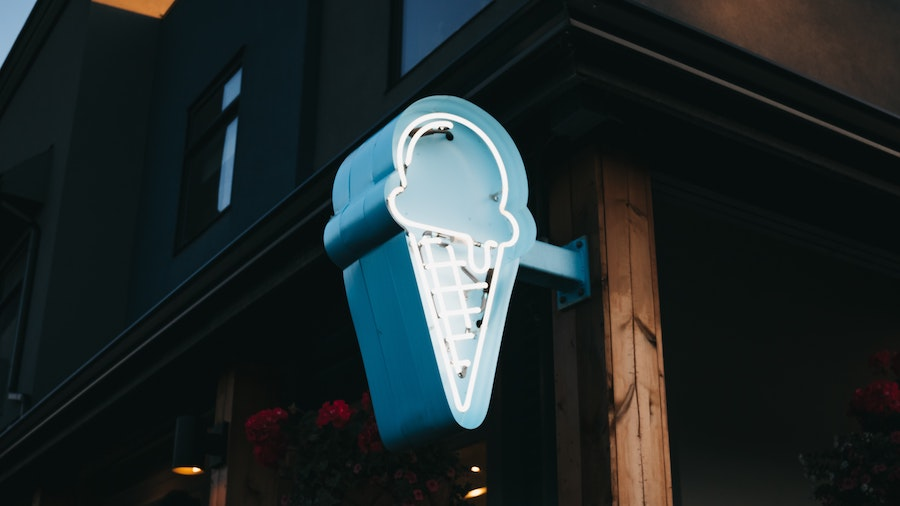

You are the happy owner of Yum Yum Ice Cream. After the last two days of amazing sales, you decided to see if you can gain any insights into your ice cream sales. Please provide the data metrics below:
* Given the dataset below, please create a pandas dataframe.
* Output the dataframe to a csv for backup.
* Output basic statistical metrics (count, mean, std, min, max, and percentiles.
* Create the correlation matrix of the 4 features.
* Create a histogram plot using pandas or matplotlib.

In [4]:
import numpy as np
import pandas as pd

In [5]:
dataset = [
    {"date": "2021-01-01", "ice_cream_type": 1, "topping": 1, "location": 1},
    {"date": "2021-01-01", "ice_cream_type": 2, "topping": 1, "location": 2},
    {"date": "2021-01-01", "ice_cream_type": 1, "topping": 2, "location": 2},
    {"date": "2021-01-01", "ice_cream_type": 3, "topping": 1, "location": 1},
    {"date": "2021-01-01", "ice_cream_type": 1, "topping": 2, "location": 2},
    {"date": "2021-01-01", "ice_cream_type": 1, "topping": 2, "location": 2},
    {"date": "2021-01-01", "ice_cream_type": 1, "topping": 1, "location": 1},
    {"date": "2021-01-02", "ice_cream_type": 1, "topping": 1, "location": 1},
    {"date": "2021-01-02", "ice_cream_type": 3, "topping": 3, "location": 1},
    {"date": "2021-01-02", "ice_cream_type": 3, "topping": 2, "location": 2},
    {"date": "2021-01-02", "ice_cream_type": 2, "topping": 3, "location": 2},
    {"date": "2021-01-02", "ice_cream_type": 2, "topping": 3, "location": 2},
    {"date": "2021-01-02", "ice_cream_type": 3, "topping": 1, "location": 1},
    {"date": "2021-01-02", "ice_cream_type": 1, "topping": 2, "location": 2},
]

In [6]:
# Given the dataset below, please create a pandas dataframe.
df = pd.DataFrame(dataset)

In [9]:
# Output the dataframe to a csv for backup.
import os
df.to_csv('dataframe1.csv')

In [8]:
#rm -r starter

In [10]:
# Always good to make sure your data look correct
df.head()

date  ice_cream_type  topping  location
0  2021-01-01               1        1         1
1  2021-01-01               2        1         2
2  2021-01-01               1        2         2
3  2021-01-01               3        1         1
4  2021-01-01               1        2         2

In [44]:
# Output basic statistical metrics (count, mean, std, min, max, and percentiles.
total_sales = len(df)
total_sales_df=pd.DataFrame({'Total Sales':[total_sales]})
total_sales_df.head()

Total Sales
0           14

In [71]:
'''
df.groupby() - (groupby object) groups df by unique values in specified column
.size() - return size of each group, 
        correspond to # of rows, sales for each date 
        - count occurences of each unique date
.reset_index(name='number_of_sales') - resets index of resulting series, assign new column name
converts index back into a column
assign column name to specified name
'''
sales_count = df.groupby('date').size().reset_index(name='number of sales per date')
print(sales_count)
sales_per_ice_cream_type= df.groupby('ice_cream_type').size().reset_index(name='number of sales per type')
print(sales_per_ice_cream_type)
sales_per_topping=df.groupby('topping').size().reset_index(name='number of sales per topping')
print(sales_per_topping)
sales_per_location=df.groupby('location').size().reset_index(name='number of sales per location')
print(sales_per_location)
mean_sales_per_location = sales_per_location['number of sales per location'].mean()
print(mean_sales_per_location)
min_sales=sales_per_location['number of sales per location'].min()
print(min_sales)
max_sales=sales_per_location['number of sales per location'].max()
print(max_sales)
std_topping=sales_per_topping['number of sales per topping'].std()
print(std_topping)
percentiles_topping = sales_per_topping['number of sales per topping'].quantile([0.25, 0.50, 0.75])
print("25th percentile of sales per topping:", percentiles_topping[0.25])
print("50th percentile (median) of sales per topping:", percentiles_topping[0.50])
print("75th percentile of sales per topping:", percentiles_topping[0.75])

         date  number of sales per date
0  2021-01-01                         7
1  2021-01-02                         7
   ice_cream_type  number of sales per type
0               1                         7
1               2                         3
2               3                         4
   topping  number of sales per topping
0        1                            6
1        2                            5
2        3                            3
   location  number of sales per location
0         1                             6
1         2                             8
7.0
6
8
1.5275252316519465
25th percentile of sales per topping: 4.0
50th percentile (median) of sales per topping: 5.0
75th percentile of sales per topping: 5.5


In [60]:
analysis=df.describe()
print(analysis)

       ice_cream_type    topping   location
count       14.000000  14.000000  14.000000
mean         1.785714   1.785714   1.571429
std          0.892582   0.801784   0.513553
min          1.000000   1.000000   1.000000
25%          1.000000   1.000000   1.000000
50%          1.500000   2.000000   2.000000
75%          2.750000   2.000000   2.000000
max          3.000000   3.000000   2.000000


In [73]:
# Create the correlation matrix of the 4 features.
features=['date', 'ice_cream_type', 'topping', 'location']
ice_cream_correlation=df[features].corr()
print(ice_cream_correlation)

'''
topping and location have a moderate + correlation
location and ice cream type have an adverse correlation
topping and type have a weak corelation
'''

                ice_cream_type   topping  location
ice_cream_type        1.000000  0.145874 -0.215758
topping               0.145874  1.000000  0.507072
location             -0.215758  0.507072  1.000000


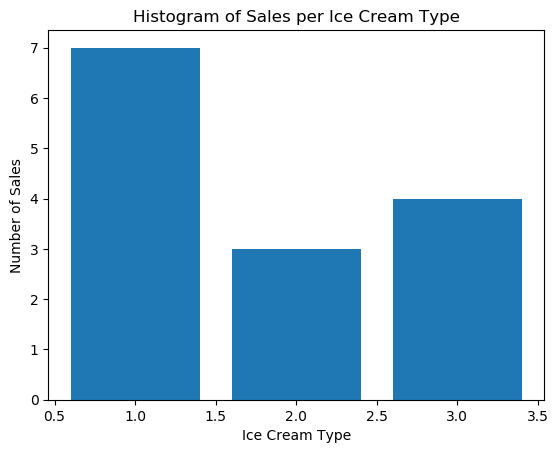

In [80]:
import matplotlib.pyplot as plt
# Create a histogram plot using pandas or matplotlib.
plt.bar(sales_per_ice_cream_type['ice_cream_type'], sales_per_ice_cream_type['number of sales per type'])
plt.xlabel('Ice Cream Type')
plt.ylabel('Number of Sales')
plt.title('Histogram of Sales per Ice Cream Type')
plt.show()